In [16]:
pip install opencv-python

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # 用於在 Google Colab 顯示圖像

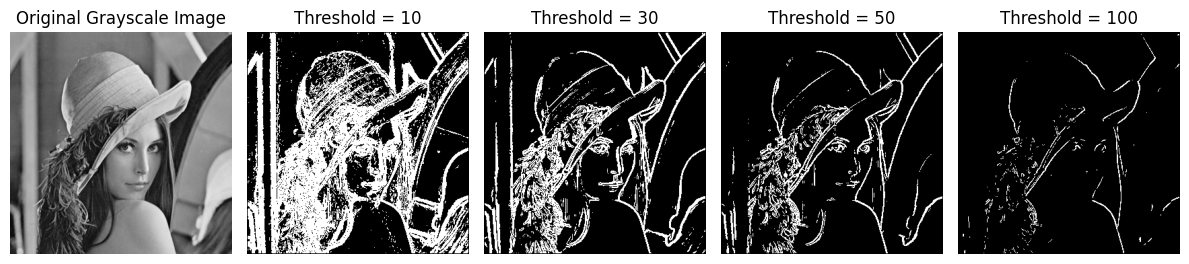

In [56]:
#Load an color image
image = cv2.imread("Lenna_(test_image).png")

#Transform to grayscale space
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cvtColor是顏色轉換函數,COLOR_BGR2GRAY是轉成灰階

#Sobel edge detector
# 定義 Sobel X 核 (檢測水平方向邊緣)
Sobel_X_Kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# 定義 Sobel Y 核 (檢測垂直方向邊緣)
Sobel_Y_Kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

def convolve2d(image, kernel):
  #取得圖片的尺寸
  image_height, image_width = image.shape

  # 建立一個與輸入圖像大小相同的輸出陣列，初始值全為0
  output =  np.zeros_like(image,  dtype=np.float32)

  # 為了確保每次取出的3*3區域都是完整的，所以會跳過第一列和最後一列
  for y in range(1, image_height - 1):
      for x in range(1, image_width - 1):
          # 對於3*3的核，取y-1到y+1,x-1到x+1的區域
          window = image[y-1:y+2, x-1:x+2]
          # 把取出來的區塊跟sobel核相乘
          output[y,x] = np.sum(window * kernel)
  return output

# 計算x與y方向的梯度
grad_x = convolve2d(image_gray, Sobel_X_Kernel)
grad_y = convolve2d(image_gray, Sobel_Y_Kernel)

# 計算每個像素的梯度幅度(平方為了避免負值)
magnitude = np.sqrt(grad_x**2 + grad_y**2)

# 正規化(讓梯度值在0到255之間，確保數值不超出範圍)
magnitude = (magnitude / magnitude.max()) * 255 # 將數值縮放到0到255
magnitude = magnitude.astype(np.uint8) # 轉換成 8-bit 圖像格式(浮點數變整數)

def edge_detection(threshold_value):
  # 轉換為黑或白的二值圖像
  edge_points = (magnitude > threshold_value) * 255
  #cv2_imshow(edge_points)
  return edge_points

# 主程式
if __name__ == "__main__":
    thresholds = [10, 30, 50, 100]  # 設定不同的閾值

    # 設置圖表的行列數，將原圖和所有結果排成一列
    rows = 1
    cols = len(thresholds) + 1  # 加1顯示灰階圖
    # 設定圖大小
    fig, ax = plt.subplots(rows, cols, figsize=(12, 5))  # 設定圖表大小

    # 顯示原始灰階圖像
    ax[0].imshow(image_gray, cmap='gray')  # 顯示灰階圖像
    ax[0].set_title("Original Grayscale Image")  # 設定灰階圖的標題
    ax[0].axis('off')  # 不顯示坐標軸

    # 顯示不同閾值的邊緣檢測結果
    for i, threshold in enumerate(thresholds):
        edge_points = edge_detection(threshold)
        ax[i + 1].imshow(edge_points, cmap='gray')  # 顯示檢測結果
        ax[i + 1].set_title(f"Threshold = {threshold}")  # 設定圖片標題
        ax[i + 1].axis('off')  # 不顯示坐標軸

    plt.tight_layout()  # 調整圖之間的間隔
    plt.show()  # 顯示圖表